<a href="https://colab.research.google.com/github/imabelaus/Fintech-in-LatAm/blob/master/Copia_de_Time_series_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pmdarima

In [0]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':80})

# Import data
df = pd.read_csv('/content/Time series dataset - Experiment_3 (1).csv', names=['value'], header=0)

In [0]:
df.head()

,value
0,0.600000
1,1.336668
2,0.245388
3,1.716000
4,0.999000


In [0]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.041668
p-value: 0.268607


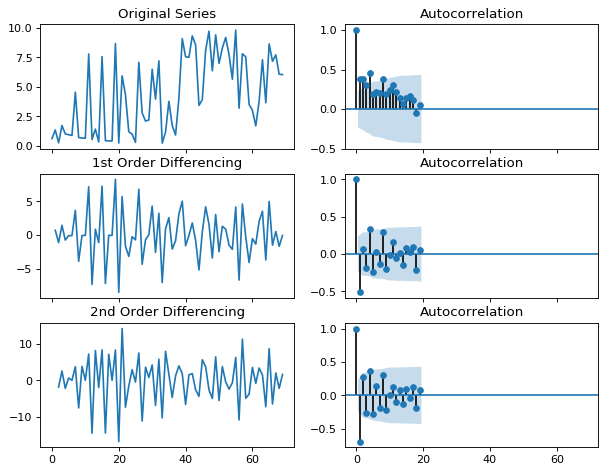

In [0]:
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [0]:
from pmdarima.arima.utils import ndiffs
df = pd.read_csv('/content/Time series dataset - Experiment_3 (1).csv', names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

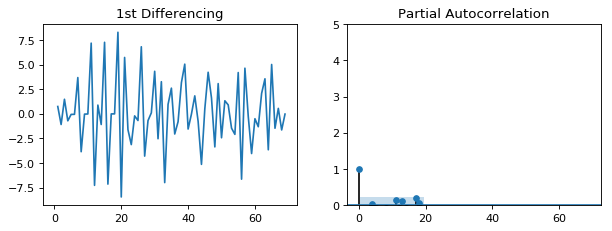

In [0]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':80})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

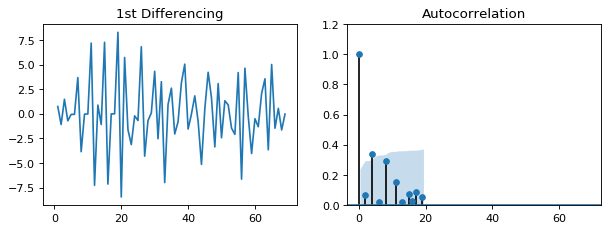

In [0]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   69
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -166.765
Method:                       css-mle   S.D. of innovations              2.634
Date:                Sun, 25 Aug 2019   AIC                            341.530
Time:                        18:11:14   BIC                            350.467
Sample:                             1   HQIC                           345.076
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0913      0.017      5.277      0.000       0.057       0.125
ar.L1.D.value     0.1042      0.120      0.865      0.390      -0.132       0.340
ma.L1.D.value    -1.0000      0.063    -

In [0]:
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   69
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -166.765
Method:                       css-mle   S.D. of innovations              2.634
Date:                Sun, 25 Aug 2019   AIC                            341.530
Time:                        18:11:16   BIC                            350.467
Sample:                             1   HQIC                           345.076
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0913      0.017      5.277      0.000       0.057       0.125
ar.L1.D.value     0.1042      0.120      0.865      0.390      -0.132       0.340
ma.L1.D.value    -1.0000      0.063    -

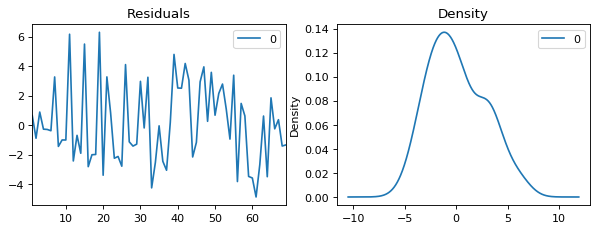

In [0]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

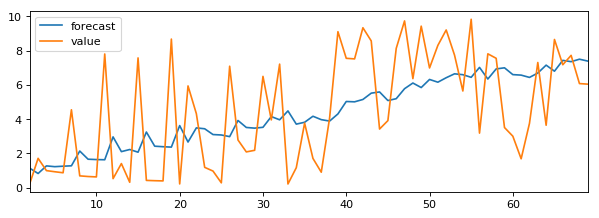

In [0]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [0]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:60]
test = df.value[59:70]

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


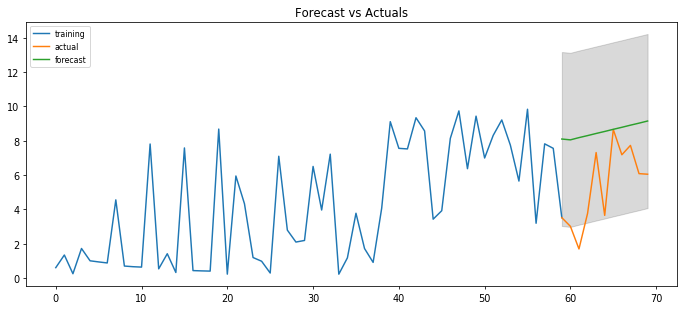

In [0]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=70)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
# Build Model
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=1)  
print(fitted.summary())





                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   59
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -141.859
Method:                       css-mle   S.D. of innovations              2.586
Date:                Sun, 25 Aug 2019   AIC                            293.717
Time:                        18:12:46   BIC                            304.105
Sample:                             1   HQIC                           297.772
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1209      0.019      6.440      0.000       0.084       0.158
ar.L1.D.value    -0.0368      0.134     -0.276      0.784      -0.299       0.225
ar.L2.D.value     0.0053      0.132     

In [0]:
# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   59
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -141.859
Method:                       css-mle   S.D. of innovations              2.586
Date:                Sun, 25 Aug 2019   AIC                            293.717
Time:                        18:13:11   BIC                            304.105
Sample:                             1   HQIC                           297.772
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1209      0.019      6.440      0.000       0.084       0.158
ar.L1.D.value    -0.0368      0.134     -0.276      0.784      -0.299       0.225
ar.L2.D.value     0.0053      0.132     

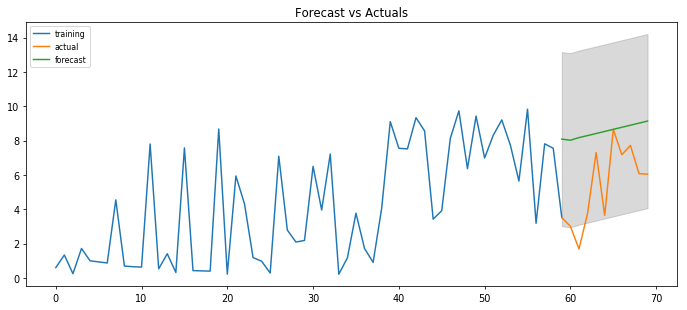

In [0]:
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=70)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

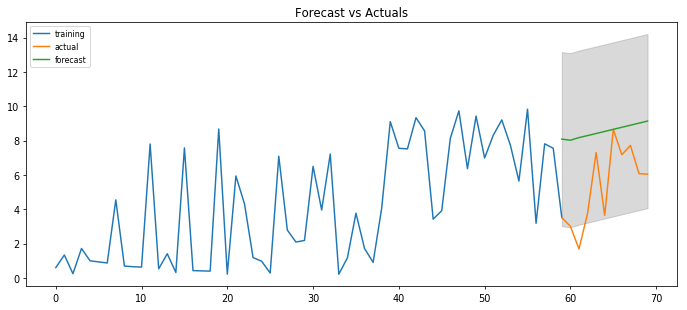

In [0]:
# Plot
plt.figure(figsize=(12,5), dpi=70)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.23965648700558698,
 'corr': 0.6803724482103777,
 'mae': 3.219403011003695,
 'mape': 0.9888898226073416,
 'me': 3.219403011003695,
 'minmax': 0.3831643802368835,
 'mpe': 0.9888898226073416,
 'rmse': 3.7649889240879033}

In [0]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('/content/Time series dataset - Experiment_3 (1).csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=1, max_q=1, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=341.530, BIC=350.467, Fit time=0.079 seconds
Fit ARIMA: order=(0, 1, 0); AIC=375.198, BIC=379.666, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=356.483, BIC=363.185, Fit time=0.020 seconds
Fit ARIMA: order=(0, 1, 1); AIC=340.278, BIC=346.980, Fit time=0.031 seconds
Total fit time: 0.149 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   69
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -167.139
Method:                       css-mle   S.D. of innovations              2.645
Date:                Sun, 25 Aug 2019   AIC                            340.278
Time:                        18:13:36   BIC                            346.980
Sample:                             1   HQIC                           342.937
                                                                              
                 coef    std e

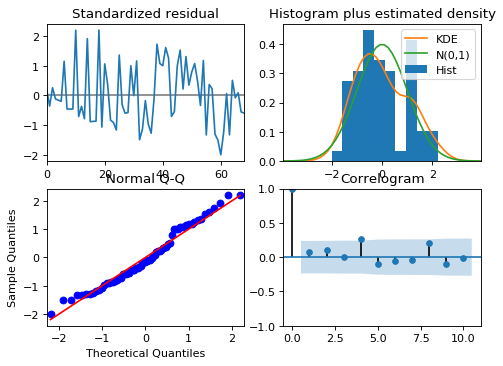

In [0]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

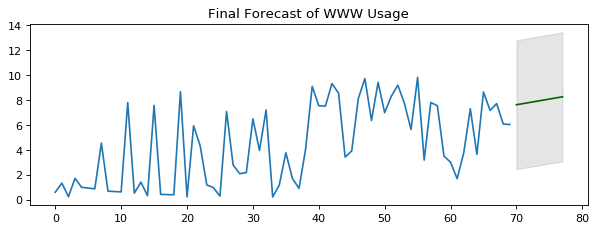

In [0]:
# Forecast
n_periods = 8
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.1)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [0]:
fc = model.predict(n_periods=8)

In [0]:
fc

array([7.62958387, 7.72105063, 7.8125174 , 7.90398417, 7.99545093,
       8.0869177 , 8.17838446, 8.26985123])

In [0]:
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

In [0]:
fc_series = pd.Series(fc, index=index_of_fc)


In [0]:
n_periods = 8
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

In [0]:
fc

array([7.62958387, 7.72105063, 7.8125174 , 7.90398417, 7.99545093,
       8.0869177 , 8.17838446, 8.26985123])

In [0]:
fc_series = pd.Series(fc, index=index_of_fc)

In [0]:
fc_series

70    7.629584
71    7.721051
72    7.812517
73    7.903984
74    7.995451
75    8.086918
76    8.178384
77    8.269851
dtype: float64